In [81]:
%pip install -q  fastai==1.0.61

Note: you may need to restart the kernel to use updated packages.


In [82]:
# check version of fastai
import fastai

fastai.__version__

'1.0.61'

In [83]:
import numpy as np 
import pandas as pd 

from fastai import *
from fastai.vision import *
from fastai.core import *
from pathlib import Path
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [84]:
image_path = "/kaggle/input/zindi-hackathon/Images/Images"

### tfms helps to do data augmentation on the data to have a better pixel values

In [85]:
tfms=get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75)

### Read the data and pass the data augmentation function

In [86]:
df = pd.read_csv("/kaggle/input/zindi-hackathon/Train.csv")

In [87]:
df.head()

,img_IDS,Label
0,ImageID_33HMDMJ3,Temple
1,ImageID_V5POEX4O,Church
2,ImageID_89CCCCW6,Enough/Satisfied
3,ImageID_GNJXOWX5,Me
4,ImageID_7Q9LOP7R,Love


In [88]:
data = ImageDataBunch.from_df(image_path,
                              df,
                              size= 224,
                              valid_pct=0.20,
                              ds_tfms=tfms,
                              num_workers=5,
                              bs=8,
                             suffix='.jpg').normalize(imagenet_stats)

In [89]:
# There are 9 classes!
print(data.c) 

9


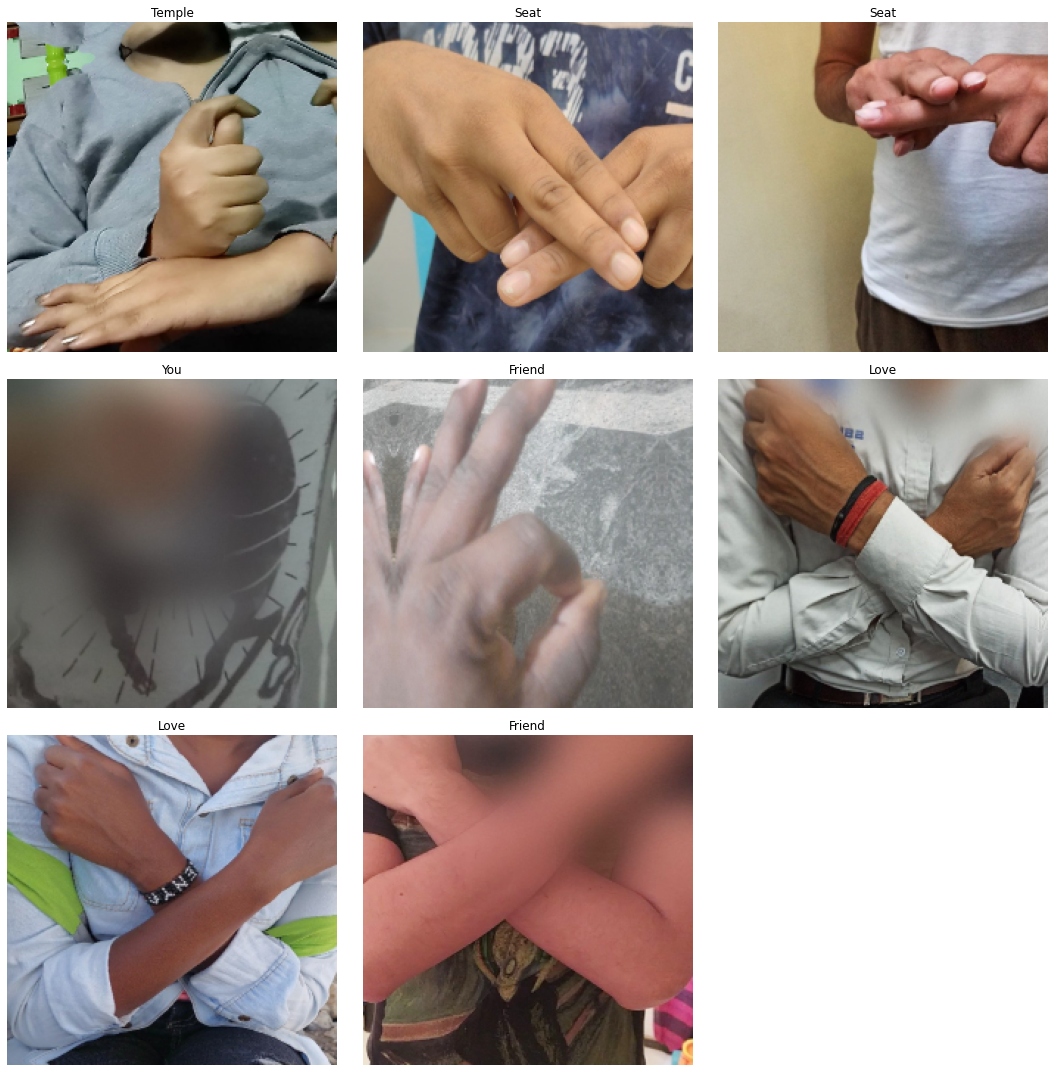

In [90]:
# Look at some examples
data.show_batch(rows=3, figsize=(15, 15)) 

### Create a baseline model using resnet18

In [91]:
import sklearn
from sklearn.metrics import log_loss

In [92]:
learn1 = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy])

In [93]:
learn2 = cnn_learner(data, models.vgg16_bn, metrics=[error_rate, accuracy])

In [94]:
learn3 = cnn_learner(data, models.resnet152, metrics=[error_rate, accuracy])

In [95]:
learn4 = cnn_learner(data, models. densenet161, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


  0%|          | 0.00/110M [00:00<?, ?B/s]

In [96]:
# # Fit
# num_epochs = 5
# learn3.fit_one_cycle(num_epochs, 1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.328589,1.370202,0.475580,0.524420,06:02
1,1.380451,0.706746,0.216173,0.783827,06:02
2,1.253814,0.530738,0.157726,0.842274,06:02
3,0.967109,0.525273,0.160128,0.839872,06:03
4,1.024606,0.494948,0.152122,0.847878,06:04


In [97]:
# num_epochs = 5
# learn4.fit_one_cycle(num_epochs, 1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.247191,1.221295,0.410729,0.589271,06:11
1,1.430419,0.689164,0.219376,0.780625,06:09
2,1.193086,0.557306,0.157726,0.842274,06:09
3,0.858773,0.521804,0.156125,0.843875,06:09
4,0.861889,0.513148,0.145717,0.854283,06:10


In [ ]:
# num_epochs = 5
# learn1.fit_one_cycle(num_epochs, 1e-4)

In [ ]:
learn5 = cnn_learner(data, models.vgg19_bn, metrics=[error_rate, accuracy])

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

In [ ]:
# num_epochs = 5
# learn5.fit_one_cycle(num_epochs, 1e-4)

In [101]:
# num_epochs = 5
# learn2.fit_one_cycle(num_epochs, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.728637,1.728216,0.360288,0.639712,05:33
1,1.382351,0.907939,0.285028,0.714972,05:32
2,1.109838,0.613646,0.205765,0.794235,05:31
3,0.863130,0.459040,0.150520,0.849480,05:30
4,0.784624,0.444366,0.132906,0.867094,05:34


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1688c9d8c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1688c9d8c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/opt/con

In [ ]:
# num_epochs = 4
# learn3.fit_one_cycle(num_epochs, 1e-2)

In [ ]:
# num_epochs = 4
# learn4.fit_one_cycle(num_epochs, 1e-2)

In [118]:
num_epochs = 7
learn4.fit_one_cycle(num_epochs, 1e-3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.092115,0.548208,0.136109,0.863891,06:11
1,0.838656,0.417541,0.121697,0.878303,06:10
2,0.605026,0.279754,0.083267,0.916733,06:01
3,0.507958,0.236793,0.071257,0.928743,05:46
4,0.471258,0.226955,0.066453,0.933547,05:48


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1688c9d8c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f1688c9d8c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1358, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1341, in _shutdown_workers
    if w.is_alive():
  File "/opt/con

In [ ]:
# num_epochs = 4
# learn4.fit_one_cycle(num_epochs, 1e-2)

## predict on test set

In [119]:
test_df = pd.read_csv("/kaggle/input/zindi-hackathon/Test.csv")

In [120]:
test_df.head()

,img_IDS
0,ImageID_USRB8QNG
1,ImageID_SZ8D1ZJI
2,ImageID_4OJO2F8J
3,ImageID_IEE4XV0B
4,ImageID_BP0O0WZ9


In [121]:
test = ImageList.from_df(test_df, image_path, suffix='.jpg')

In [122]:
data.add_test(test)

In [123]:
preds_test,y_test = learn4.get_preds(DatasetType.Test)

In [124]:
preds_test[:,1]

tensor([6.4363e-05, 9.9982e-01, 1.1362e-04,  ..., 3.6338e-03, 1.0307e-03,
        2.3275e-05])

In [125]:
y_test

tensor([0, 0, 0,  ..., 0, 0, 0])

In [126]:
sub=pd.read_csv('/kaggle/input/sample-csv/SampleSubmission.csv')
k=[]
for col in sub.columns: 
  k.append(col) # creating list of the label

In [127]:
k

['img_IDS',
 'Church',
 'Enough/Satisfied',
 'Friend',
 'Love',
 'Me',
 'Mosque',
 'Seat',
 'Temple',
 'You']

In [128]:
import os
submission = pd.DataFrame()
submission["ID"] = test_df["img_IDS"]
for i, c in enumerate(learn4.data.classes):
  print(c)
  submission[c] = preds_test[:,i]
submission.head()

Church
Enough/Satisfied
Friend
Love
Me
Mosque
Seat
Temple
You


,ID,Church,Enough/Satisfied,Friend,Love,Me,Mosque,Seat,Temple,You
0,ImageID_USRB8QNG,0.000102,0.000064,0.000076,1.034483e-04,0.000045,0.000207,0.000051,0.999267,0.000084
1,ImageID_SZ8D1ZJI,0.000105,0.999819,0.000009,3.991393e-07,0.000001,0.000045,0.000001,0.000005,0.000014
2,ImageID_4OJO2F8J,0.011225,0.000114,0.000320,8.396911e-04,0.001138,0.985873,0.000040,0.000273,0.000177
3,ImageID_IEE4XV0B,0.046144,0.000153,0.000515,2.387998e-04,0.000082,0.945261,0.000911,0.006628,0.000067
4,ImageID_BP0O0WZ9,0.000120,0.000145,0.000012,4.932944e-05,0.000328,0.000306,0.000117,0.000049,0.998874


In [131]:
submission.to_csv('base_model.csv', index=False)

## Improving your Model Accuracy

In [130]:
* Perform more data augmentation
* Try other pre-trained model like (efficientnet model)
* Improve the epochs size
* Test Time Augmentations 

SyntaxError: invalid syntax (411593136.py, line 1)